In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from fenics import UnitSquareMesh, Expression, Constant, Function
from fenics import FunctionSpace, TrialFunction, TestFunction, DirichletBC
from fenics import dot, grad, solve, plot, dx, errornorm
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
# Create mesh and define function space
mesh = UnitSquareMesh(16, 16)
V = FunctionSpace(mesh, 'P', 2)

In [3]:
# Define boundary condition
u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

In [4]:
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = dot(grad(u), grad(v)) * dx
L = f * v * dx

In [5]:
# Compute solution
u = Function(V)
solve(a == L, u, bc)

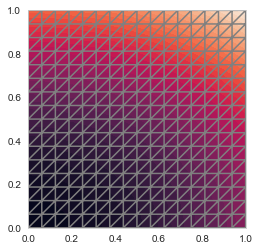

In [6]:
# Plot solution and mesh
_ = plot(u)
_ = plot(mesh)

In [7]:
# Compute error in L2 norm
error_L2 = errornorm(u_D, u, 'L2')

In [8]:
# Compute maximum error at vertices
vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)

In [9]:
error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))
# Print errors
print('error_L2 =', error_L2)
print('error_max =', error_max)

error_L2 = 9.735037970971863e-14
error_max = 1.687538997430238e-13
